**### Introduction **
What’s the best (or at least the most popular) Halloween candy? That was the question this dataset was collected to answer. Data was collected by creating a website where participants were shown presenting two fun-sized candies and asked to click on the one they would prefer to receive. In total, more than 269 thousand votes were collected from 8,371 different IP addresses.

Content
candy-data.csv includes attributes for each candy along with its ranking. For binary variables, 1 means yes, 0 means no. The data contains the following 

fields:
chocolate: Does it contain chocolate?
fruity: Is it fruit flavored?
caramel: Is there caramel in the candy?
peanutalmondy: Does it contain peanuts, peanut butter or almonds?
nougat: Does it contain nougat?
crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
hard: Is it a hard candy?
bar: Is it a candy bar?
pluribus: Is it one of many candies in a bag or box?
sugarpercent: The percentile of sugar it falls under within the data set.
pricepercent: The unit price percentile compared to the rest of the set.
winpercent: The overall win percentage according to 269,000 matchup

The Difference Between Chocolate and Candy
Is chocolate candy? In short, the answer is no. The big difference between chocolate and candy is the proportion of ingredients. Candy's main ingredient is sugar, sweet and simple. Chocolate's defining ingredient is chocolate solids. This is also why milk and dark chocolates are distinguished by their percentages of chocolate solids. Chocolate vs. Candy. What's the difference between chocolate and candy? Quality Chocolate from Rocky Mountain Chocolate Factory Chocolate solids are different than cocoa butter or cocoa plant-based products. Chocolate comes from the cocoa plant—or more specifically its fruit. Chocolate solids, moreover, come mostly from the chocolate liquor, a paste that comes from ground cocoa bean nibs. 

That means that technically, white chocolate is not chocolate. Instead of cocoa solids, white chocolate is made of cocoa butter. 

Can I call chocolate candy? 
Chocolate is not actually candy, but a lot of people refer to it as such. In the modern era, chocolate is consumed in the same snackable way that candy is eaten. Historically, making and consuming chocolate was a much more complicated process. Today, it's more acceptable to consider chocolate a subset of candy. Think about this: while chocolate is often included in candy shops, you rarely see candies in chocolatiers, or chocolate shops.
Candy

Candy, also called sweets or lollies, is a confection that features sugar as a principal ingredient. The category, called sugar confectionery, encompasses any sweet confection, including chocolate, chewing gum, and sugar candy. Vegetables, fruit, or nuts which have been glazed and coated with sugar are said to be candied. Physically, candy is characterized by the use of a significant amount of sugar or sugar substitutes. Unlike a cake or loaf of bread that would be shared among many people, candies are usually made in smaller pieces. However, the definition of candy also depends upon how people treat the food. Unlike sweet pastries served for a dessert course at the end of a meal, candies are normally eaten casually, often with the fingers, as a snack between meals. Each culture has its own ideas of what constitutes candy rather than dessert. The same food may be a candy in one culture and a dessert in another.


Table of Content

1. Problem Statement

2. Data Loading and Description

3. Exploratory Data Analysis

4. Introduction to Linear Regression

    4.1. Linear Regression Equation with Errors in consideration

    4.1.1. Assumptions of Linear Regression

    4.2. Preparing X and y using pandas

    4.3. Splitting X and y into training and test datasets

    4.4. Linear regression in scikit-learn

    4.5. Interpreting Model Coefficients

    4.6. Using the Model for Prediction

5. Model evaluation

    5.1. Model evaluation using metrics
  
    5.2. Model Evaluation using Rsquared value.

6. Feature Selection

7. Handling Categorical Features 

8. Interpritation


### 1. Problem Statement

in this data we can find out that,
1. Which qualities are associated with higher rankings?
2. What’s the most popular candy? 
3. which combinations of ingredients that can make good candy or a chocolate?

This analysis we will be focusing on deriving the most important attributes of a candy. We’ll be utilizing a statistical method called Shapley Value Regression to derive the key factors of a successful candy!


### 2. Data Loading and Description










In [0]:
### Importing packages      
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analys
### Import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output
from __future__ import division, absolute_import, print_function

In [0]:
### Importing the Dataset

candy_data = pd.read_csv("https://raw.githubusercontent.com/banduguide/URP_ML1/master/Candy_Data.csv")     # Importing training dataset using pd.read_csv

In [8]:
### Preprocessing the data
candy_data.head ()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,one dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,one quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,air heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465




### 3. Exploratory Data Analysis







In [9]:
candy_data.shape

(85, 13)

In [10]:
candy_data.describe

<bound method NDFrame.describe of                competitorname  chocolate  ...  pricepercent  winpercent
0                   100 grand          1  ...         0.860   66.971725
1                3 musketeers          1  ...         0.511   67.602936
2                    one dime          0  ...         0.116   32.261086
3                 one quarter          0  ...         0.511   46.116505
4                   air heads          0  ...         0.511   52.341465
..                        ...        ...  ...           ...         ...
80                  twizzlers          0  ...         0.116   45.466282
81                   warheads          0  ...         0.116   39.011898
82        welchs fruit snacks          0  ...         0.313   44.375519
83  werthers original caramel          0  ...         0.267   41.904308
84                   whoppers          1  ...         0.848   49.524113

[85 rows x 13 columns]>

In [11]:
candy_data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [12]:
candy_data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

3.1 Calculating and plotting heatmap correlation




Text(0.5, 1, 'Correlation between features')

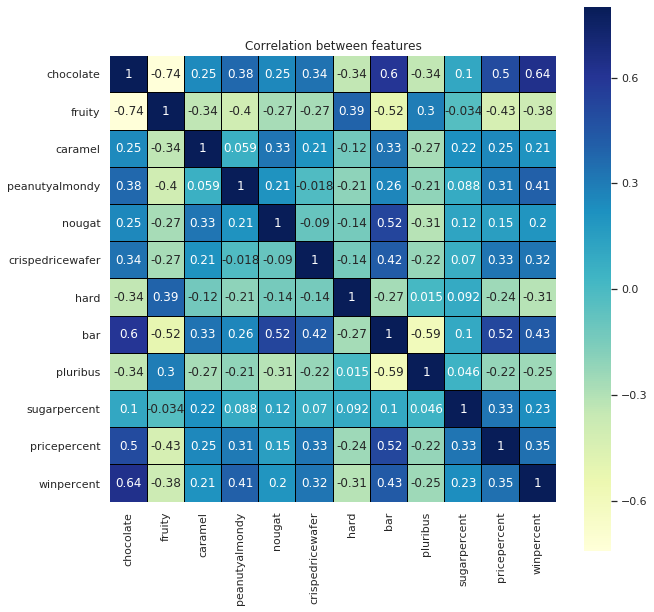

In [13]:
### Correlation between features
corr = candy_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

**Observations:**
1. fruity flaver is showing nagetive correlation with chocolate
2. fruity flaver is showing good correlation with pluribus and haed texture,that means good combination for candy.
3. caramel having negative correlation with fruity and hard texture
4. caramel having good combination with chocoalte,nouguts ,crispedrice waffers and bar
5. peanutyalmandy shows good correlation with chocolate,nouguts ,crispedrice waffers and bar
6.  peanutyalmandy shows negative correlation with candy type products.
7. crispedrice waffers shows good combination with chocolate ,caramel and bar.
8. crispedrice waffers shows nagative correlation with nougat,peanutyalmandy,fruity, pluribus,hard candy type material.
9. hard texture shows negative correlation with  chocoalte,nouguts ,crispedrice waffers and bar, peanutyalmandy,caramel
10. hard texture shows good combination with fruity flaver
11. chocolate shows high winpercentage

In [14]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().abs().loc[i,j]] for i,j in list(itertools.combinations(X.corr().abs(), 2))],columns=['Feature1','Feature2','corr'])    
    return df.sort_values(by='corr',ascending=False).reset_index(drop=True)

# prints a descending list of correlation pair (Max on top)
display(corrank(candy_data))

,Feature1,Feature2,corr
0,chocolate,fruity,0.741721
1,chocolate,winpercent,0.636517
2,chocolate,bar,0.597421
3,bar,pluribus,0.593409
4,nougat,bar,0.522976
...,...,...,...
61,caramel,peanutyalmondy,0.059356
62,pluribus,sugarpercent,0.045523
63,fruity,sugarpercent,0.034393
64,peanutyalmondy,crispedricewafer,0.017646


In [15]:
candy_data.isnull().sum()/len(candy_data)

competitorname      0.0
chocolate           0.0
fruity              0.0
caramel             0.0
peanutyalmondy      0.0
nougat              0.0
crispedricewafer    0.0
hard                0.0
bar                 0.0
pluribus            0.0
sugarpercent        0.0
pricepercent        0.0
winpercent          0.0
dtype: float64

In [0]:
winners = candy_data[candy_data.winpercent>candy_data.winpercent.quantile(.6)]

In [17]:
winners.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
6,baby ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
18,haribo gold bears,0,1,0,0,0,0,0,0,1,0.465,0.465,57.119740
22,hersheys kisses,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454


3.2 **Univariate Analysis**

Text(0.5, 1.0, 'Relation of Chocolate and Win Percent')

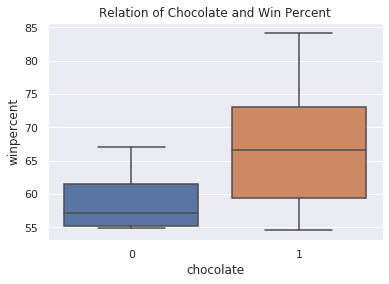

In [18]:
### Univariate Analysis
sns.boxplot(x="chocolate", y="winpercent", data=winners).set_title('Relation of Chocolate and Win Percent')

Inference:- From the above plot we can say that more than 60% of the population likes Chocolate so it might be important parameter.

Text(0.5, 1.0, 'Relation of Fruity and Win Percent')

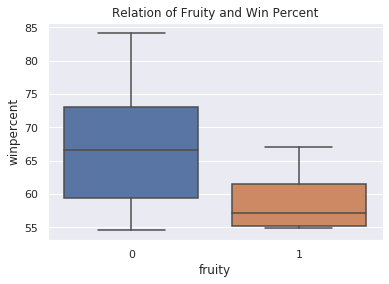

In [19]:
sns.boxplot(x="fruity", y="winpercent", data=winners).set_title('Relation of Fruity and Win Percent')

Inference:- From the above plot we can say that more than 60% of the population likes Fruity so it might be important parameter.

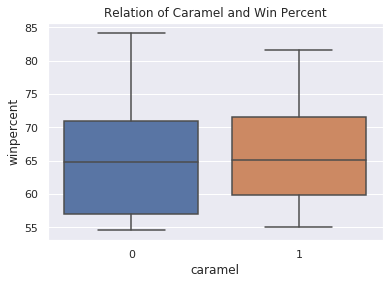

In [20]:
sns.boxplot(x="caramel", y="winpercent", data=winners).set_title('Relation of Caramel and Win Percent');

Inference:- From the above plot we can say that more than 60% of the population likes Caramel so it might be important parameter.

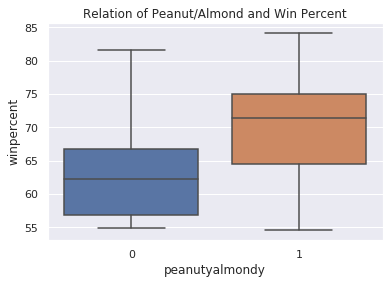

In [21]:
sns.boxplot(x="peanutyalmondy", y="winpercent", data=winners).set_title('Relation of Peanut/Almond and Win Percent');

Inference:- From the above plot we can say that more than 60% of the population likes Peanut/Almond so it might be important parameter.



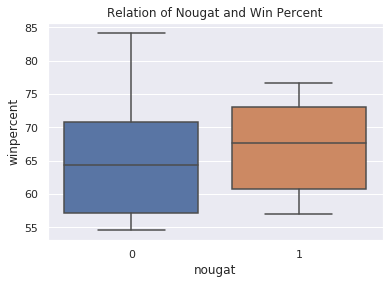

In [22]:
sns.boxplot(x="nougat", y="winpercent", data=winners).set_title('Relation of Nougat and Win Percent');

Inference:- From the above plot we can say that more than 60% of the population likes Nougat so it might be important parameter.

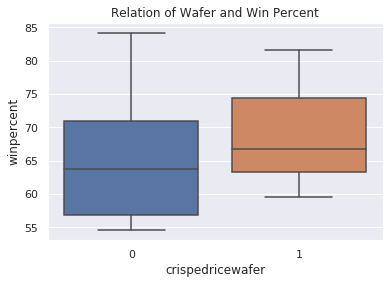

In [23]:
sns.boxplot(x="crispedricewafer", y="winpercent", data=winners).set_title('Relation of Wafer and Win Percent');

Inference:- From the above plot we can say that more than 60% of the population likes Wafer so it might be important parameter.

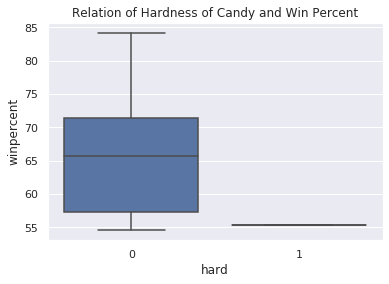

In [24]:
sns.boxplot(x="hard", y="winpercent", data=winners).set_title('Relation of Hardness of Candy and Win Percent');

Inference:- From the above plot we can say that more than 60% of the population likes Soft Candies so it might be important parameter.

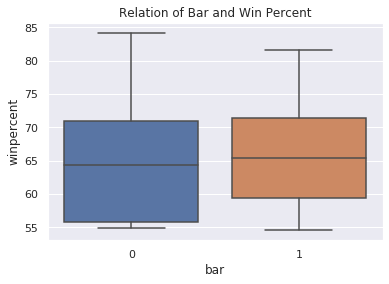

In [25]:
sns.boxplot(x="bar", y="winpercent", data=winners).set_title('Relation of Bar and Win Percent');

Inference:- From the above plot we can say that more than 60% of the population likes Bar.

But the confidence boundy is very less to reach out to a clear conlusion.

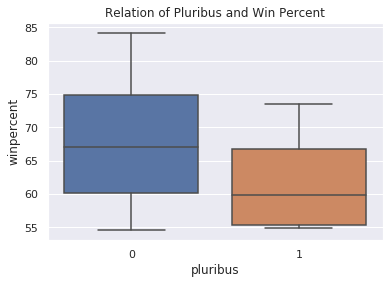

In [26]:
sns.boxplot(x="pluribus", y="winpercent", data=winners).set_title('Relation of Pluribus and Win Percent');

Inference:- From the above plot we can say that less than 60% of the population do not likes Bapluribus.

3.3 **Bivariate Analysis**



In [27]:
sns.jointplot(x="sugarpercent", y="winpercent", data=winners,kind="kde",stat_func=spearmanr)

NameError: ignored

Linearity of Sugar and Win Percent:- The above plot proves the alternative hypothesis that sugar percentage is not linear to the popularity of the candy i.e. sugar content of candy doesn't contribute to the popularity of the candy.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


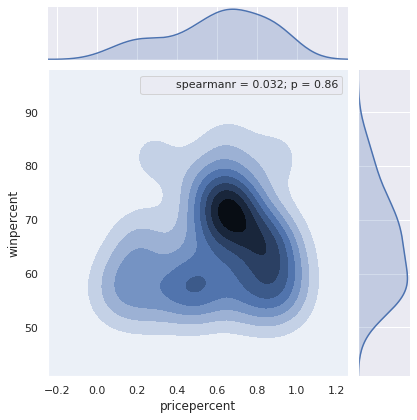

In [28]:
from scipy.stats import spearmanr
sns.jointplot(x="pricepercent", y="winpercent", data=winners,kind="kde",stat_func=spearmanr)

Linearity of Price and Win Percent The above plot proves the alternative hypothesis that price percentage is not linear to the popularity of the candy i.e. cost of candy doesn't contribute to the popularity of the candy.

3.4 **Most Popular and Least Popular Candies**



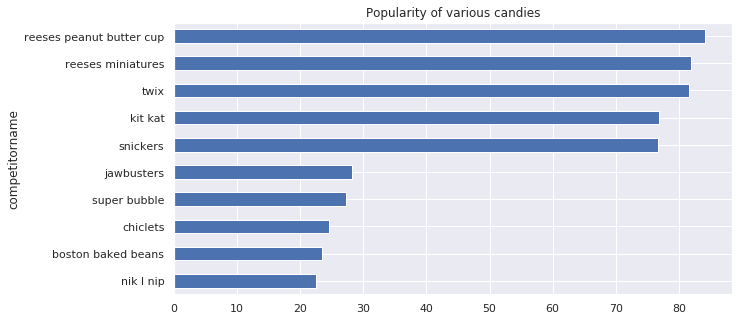

In [29]:
popularity = candy_data[['competitorname','winpercent']].sort_values(by='winpercent')
pd.concat([popularity.head(5),popularity.tail(5)],axis=0).plot(x='competitorname',y='winpercent',kind='barh',title='Popularity of various candies',sort_columns=True,figsize = (10,5),legend=False)

3.5 **Visualising Pairwise correlation**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


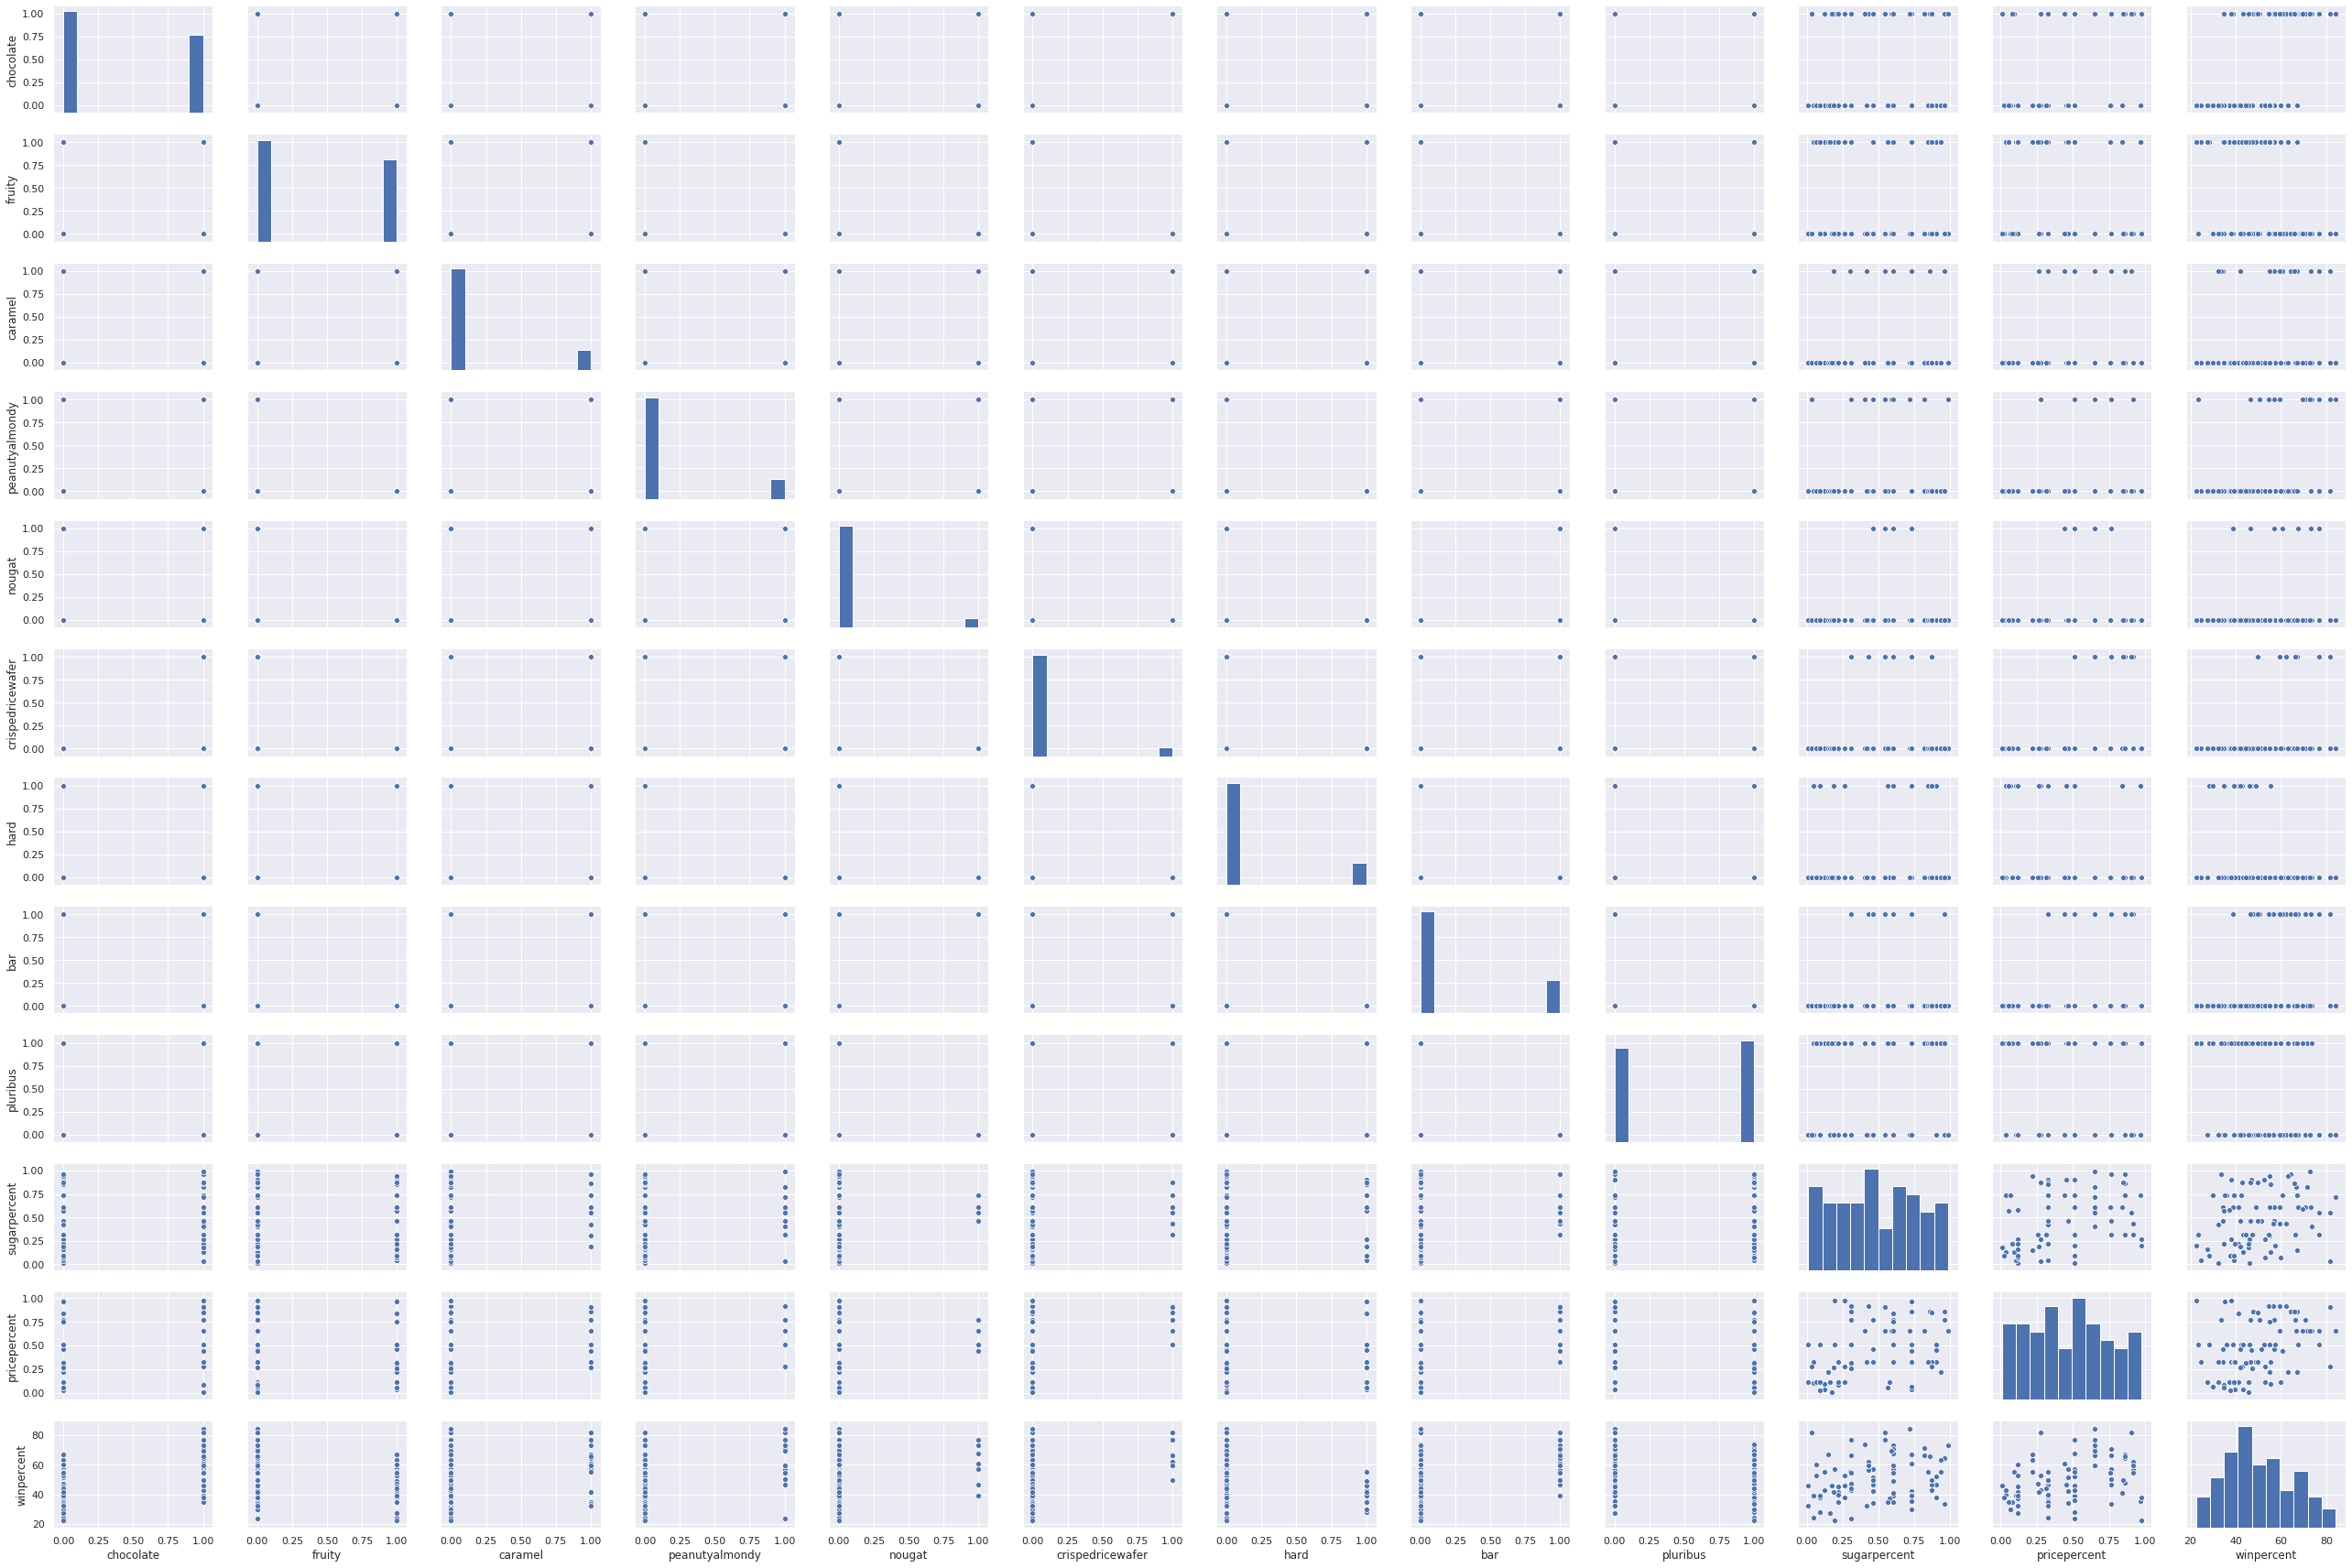

In [30]:
sns.pairplot(candy_data, size = 2, aspect = 1.5)


 **4.1 Linear Regression Equation with Errors in consideration**

**4.2 Preparing X and y using pandas**

In [0]:
# use the list to select a subset of the original DataFrame-+
feature_cols = ['chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent']                # create a Python list of feature names
X = candy_data[feature_cols]             

In [32]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(85, 11)


In [33]:
Y = candy_data.winpercent
Y.head()

0    66.971725
1    67.602936
2    32.261086
3    46.116505
4    52.341465
Name: winpercent, dtype: float64

In [34]:
print(type(Y))
print(Y.shape)

<class 'pandas.core.series.Series'>
(85,)


**4.3 Splitting X and y into training and test datasets.**

In [0]:
candy_data.to_csv("datasump.csv")

In [0]:
from sklearn.model_selection import train_test_split

def split(X,Y):
    return train_test_split(X, Y, test_size=0.20, random_state=1)

In [37]:
X_train, X_test, Y_train, Y_test=split(X,Y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',Y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('Y_test shape: ',Y_test.shape)

Train cases as below
X_train shape:  (68, 11)
Y_train shape:  (68,)

Test cases as below
X_test shape:  (17, 11)
Y_test shape:  (17,)


In [38]:
X_train.to_csv("datasump_xtrain.csv") 
X_test.to_csv("datasump_xtest.csv") 
Y_train.to_csv("datasump_ytrain.csv")
Y_test.to_csv("datasump_ytest.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [39]:
X_train

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
35,1,0,1,0,0,0,0,0,1,0.302,0.511
68,0,1,0,0,0,0,0,0,1,0.151,0.220
45,0,1,0,0,0,0,0,0,1,0.220,0.325
19,0,0,0,0,0,0,0,0,1,0.465,0.465
79,1,0,1,0,0,1,0,1,0,0.546,0.906
...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,0,0,0,0,0,0,0.313,0.511
9,0,1,1,0,0,0,0,0,0,0.604,0.325
72,0,1,0,0,0,0,0,0,0,0.162,0.116
12,0,1,0,0,0,0,0,0,1,0.046,0.325


In [40]:
Y_test

38    64.353340
44    22.445341
27    57.219250
40    54.526451
36    73.099556
80    45.466282
58    42.849144
69    34.578991
84    49.524113
56    65.716286
67    52.825947
53    73.434990
48    37.722336
66    59.863998
63    45.995827
10    38.975037
2     32.261086
Name: winpercent, dtype: float64

In [41]:
X_test

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
38,1,0,1,0,0,0,0,1,0,0.965,0.860
44,0,1,0,0,0,0,0,0,1,0.197,0.976
27,1,0,0,0,0,0,0,0,1,0.197,0.511
40,1,0,0,1,0,0,0,1,0,0.313,0.918
36,1,0,1,0,1,0,0,1,0,0.604,0.651
80,0,1,0,0,0,0,0,0,0,0.220,0.116
58,0,1,0,0,0,0,1,0,1,0.872,0.279
69,0,1,0,0,0,0,1,0,1,0.569,0.058
84,1,0,0,0,0,1,0,0,1,0.872,0.848
56,1,0,1,0,0,0,0,0,1,0.860,0.860


In [42]:
Y_train

35    55.064072
68    67.037628
45    39.446800
19    34.158958
79    81.642914
        ...    
75    43.068897
9     34.517681
72    27.303865
12    24.524988
37    60.800701
Name: winpercent, Length: 68, dtype: float64

**4.4 Linear regression in scikit-learn**

In [0]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [0]:
from sklearn import metrics

In [45]:
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
X_test.shape

(17, 11)

In [47]:
Y_test.iloc[0]

64.35334

In [48]:
X_test.iloc[0]

chocolate           1.000
fruity              0.000
caramel             1.000
peanutyalmondy      0.000
nougat              0.000
crispedricewafer    0.000
hard                0.000
bar                 1.000
pluribus            0.000
sugarpercent        0.965
pricepercent        0.860
Name: 38, dtype: float64

In [49]:
[X_test.iloc[5]]

[chocolate           0.000
 fruity              1.000
 caramel             0.000
 peanutyalmondy      0.000
 nougat              0.000
 crispedricewafer    0.000
 hard                0.000
 bar                 0.000
 pluribus            0.000
 sugarpercent        0.220
 pricepercent        0.116
 Name: 80, dtype: float64]

In [50]:
linreg.predict([X_test.iloc[5]])

array([44.61303163])

In [51]:
Y_test.iloc[0]

64.35334

In [0]:
Y_pred = linreg.predict([X_test.iloc[5]])

In [53]:
Y_pred

array([44.61303163])

In [54]:
X_test.iloc[0]

chocolate           1.000
fruity              0.000
caramel             1.000
peanutyalmondy      0.000
nougat              0.000
crispedricewafer    0.000
hard                0.000
bar                 1.000
pluribus            0.000
sugarpercent        0.965
pricepercent        0.860
Name: 38, dtype: float64

In [55]:
linreg.predict([X_test.iloc[1]])


array([40.86918101])

In [56]:
Y_pred - Y_test.iloc[1]

array([22.16769063])

In [57]:
X_test.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
38,1,0,1,0,0,0,0,1,0,0.965,0.860
44,0,1,0,0,0,0,0,0,1,0.197,0.976
27,1,0,0,0,0,0,0,0,1,0.197,0.511
40,1,0,0,1,0,0,0,1,0,0.313,0.918
36,1,0,1,0,1,0,0,1,0,0.604,0.651


In [58]:
linreg.predict(X_test) 

array([55.10908166, 40.86918101, 52.10260665, 59.64778761, 59.07660229,
       44.61303163, 42.79443834, 39.50039241, 75.55900291, 55.82762664,
       40.0692605 , 62.83637085, 32.36419277, 40.0692605 , 36.00247316,
       62.77123871, 34.17200198])

In [59]:
Y_pred_test = linreg.predict(X_test) 
RMSE_test = (metrics.mean_squared_error(Y_test,Y_pred_test))                          # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the test set is 167.05181735247982


When you do scaling outside linear regression, the RMSE calculations shows scaled version of devaition. You would have to rescale them if you want to know actual deviation with respect to actual scale of Y (Sales)
When you do scaling inside LR Function, it scales the data to fit the line, but it automatically scales the RMSE back to original Y (Sales)
This only applies to LR 

Scaling --- IT scales the value into specific range

2 Processs for Accuracy Calcualtions

1) Y_Pred Y_Test Manual Scaling 2) Y_Pred Y_Test -> [Normalize=True] Algo Scaling 3) Y_Pred Y_Test -> ; same result as 1. ; Algo Scaling 4) Y_Pred Y_Test ->; same result as 1 [Algo Scaling]

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(pd.DataFrame(Y_test))
scaler.transform(pd.DataFrame(Y_test))

array([[ 1.01350951],
       [-1.95611498],
       [ 0.50798386],
       [ 0.31717061],
       [ 1.63327132],
       [-0.32483809],
       [-0.51028997],
       [-1.09631768],
       [-0.03729789],
       [ 1.11008864],
       [ 0.19667193],
       [ 1.65704036],
       [-0.87357848],
       [ 0.6953922 ],
       [-0.28731423],
       [-0.78481138],
       [-1.26056574]])

In [61]:
Y_pred

array([44.61303163])

In [62]:
Y_test

38    64.353340
44    22.445341
27    57.219250
40    54.526451
36    73.099556
80    45.466282
58    42.849144
69    34.578991
84    49.524113
56    65.716286
67    52.825947
53    73.434990
48    37.722336
66    59.863998
63    45.995827
10    38.975037
2     32.261086
Name: winpercent, dtype: float64

if you plan to use scaling from Algorithm, don't scale before.
when you don't pass any parameters to algo, it means you are working on default/baseline model.

In [0]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [64]:
linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=False, fit_intercept=False)
linreg.fit(X_train, Y_train) 
Y_pred_test = linreg.predict(X_test)   
# make predictions on the testing set
RMSE_test = (metrics.mean_squared_error(Y_test, Y_pred_test)) # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the test set is 311.782422697765


In [66]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)
linreg.fit(X_train, Y_train) 
Y_pred_test = linreg.predict(X_test)   
# make predictions on the testing set
RMSE_test = (metrics.mean_squared_error(Y_test, Y_pred_test)) # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the test set is 167.05181735247984


In [67]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=False)
linreg.fit(X_train, Y_train) 
Y_pred_test = linreg.predict(X_test)   
# make predictions on the testing set
RMSE_test = (metrics.mean_squared_error(Y_test, Y_pred_test)) # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the test set is 167.05181735247982


In [68]:
# This is after doing manual scaling. Make sure the X_train and Y_train gets scaled before sending to this function 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,Y_train) 
Y_pred_test = linreg.predict(X_test)   

                                                # make predictions on the testing set
RMSE_test = (metrics.mean_squared_error(Y_test, Y_pred_test))                          # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the test set is 167.05181735247982


# when gridsearch does the training, it create its own Train & Test. Make sure, wheever you do GridSearch, use random_seed 

In [69]:
from sklearn.model_selection import GridSearchCV

# define the parameters , it should always be a dictionary 
parameters = {'normalize':[True,False], 'copy_X':[True, False], 'fit_intercept':[True,False]}
linreg = LinearRegression() # this the model on which i would want to experiment 

# Call the GridSearch Class, Pass the model and parameter 
linreg = GridSearchCV(linreg,parameters)


linreg.fit(X_train, Y_train)                                                           # fit the model to the training data (learn the coefficients)
#, So internal Train test get created on this X_Train & Y_Train 80,20% 
# So, it creates new 80,20 split from the previous(global) 80% 

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

# This best_score_ gives you the RMSE of internal Train Test set of GridSearch 

# always fight for best stable model and not accurate model. -> Real World/Depolyment Prospective 

In [70]:
print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
# Of the internal Test set which is created out of 80% 

Mean cross-validated score of the best_estimator :  0.2881236105975919


In [71]:
linreg.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [72]:
linreg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
linreg.fit(X_train, Y_train)
Y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

RMSE_test = (metrics.mean_squared_error(Y_test, Y_pred_test))                          # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the test set is 167.05181735247984


### 4.5 Interpreting Model Coefficients

In [73]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: 34.13574296847616
Coefficients: [18.92584064  8.05126009 -3.58659701  8.45203415  7.93401708 15.99830741
 -6.33077947 -4.73633764 -2.81719118 11.43430413 -0.77170981]


In [74]:
linreg.coef_

array([18.92584064,  8.05126009, -3.58659701,  8.45203415,  7.93401708,
       15.99830741, -6.33077947, -4.73633764, -2.81719118, 11.43430413,
       -0.77170981])

In [75]:
linreg.intercept_

34.13574296847616

In [0]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [77]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 34.13574296847616
chocolate 18.92584064484591
fruity 8.05126009012222
caramel -3.5865970139352044
peanutyalmondy 8.452034151853507
nougat 7.934017078848617
crispedricewafer 15.99830741233255
hard -6.33077946779993
bar -4.736337641899247
pluribus -2.8171911783408907
sugarpercent 11.434304133971015
pricepercent -0.7717098121223521


### 4.6 Using the Model for Prediction

In [0]:
Y_pred_train = linreg.predict(X_train)  

In [0]:
Y_pred_test = linreg.predict(X_test)   

## 5. Model evaluation 

### 5.1 Model Evaluation using __metrics.__

<a id=section405></a>

The difference between Train Accuracy and Test Accuracy should be least for a good Model
Train Accuracy. y_train ~~ model.predict(X_train)


Mean Squared Error (MSE) is the mean of the squared errors:
1n∑i=1n(yi−y^i)2

Computing the MSE for our Sales predictions

In [0]:
MAE_train = metrics.mean_absolute_error(Y_train, Y_pred_train)
MAE_test = metrics.mean_absolute_error(Y_test, Y_pred_test)

In [81]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 7.638014059243085
MAE for test set is 10.464152742303979


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [0]:
MSE_train = metrics.mean_squared_error( Y_train, Y_pred_train)
MSE_test = metrics.mean_squared_error(Y_test, Y_pred_test)

In [83]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 90.21124364486971
MSE for test set is 167.05181735247984


**5.2 Model Evaluation using Rsquared value.**

There is one more method to evaluate linear regression model and that is by using the Rsquared value.

R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is R-squared will always increase as you add more features to the model, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called adjusted R-squared that penalizes model complexity (to control for overfitting).



In [84]:
Yhat = linreg.predict(X_train)
SS_Residual = sum((Y_train-Yhat)**2)
SS_Total = sum((Y_train-np.mean(Y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.5855129919383149 0.5040959010690553


**6. Feature Selection**


At times some features do not contribute much to the accuracy of the model, in that case its better to discard those features.

Also Applying Gridsearch method for exhaustive search over specified parameter values of estimator.

In [85]:
 feature_cols = ['chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent']                                                          # create a Python list of feature names
X = candy_data[feature_cols]  
Y = candy_data.winpercent

X_train, X_test, Y_train, Y_test=split(X,Y)

linreg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
linreg.fit(X_train, Y_train)
Y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

RMSE_test = (metrics.mean_squared_error(Y_test, Y_pred_test))                          # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the test set is 167.05181735247984


In [86]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: 34.13574296847616
Coefficients: [18.92584064  8.05126009 -3.58659701  8.45203415  7.93401708 15.99830741
 -6.33077947 -4.73633764 -2.81719118 11.43430413 -0.77170981]


**7. Handling Categorical Features**


In [87]:
pd.cut(candy_data['winpercent'], bins=6)

0     (63.602, 73.891]
1     (63.602, 73.891]
2     (22.384, 32.734]
3     (43.024, 53.313]
4     (43.024, 53.313]
            ...       
80    (43.024, 53.313]
81    (32.734, 43.024]
82    (43.024, 53.313]
83    (32.734, 43.024]
84    (43.024, 53.313]
Name: winpercent, Length: 85, dtype: category
Categories (6, interval[float64]): [(22.384, 32.734] < (32.734, 43.024] < (43.024, 53.313] <
                                    (53.313, 63.602] < (63.602, 73.891] < (73.891, 84.18]]

In [0]:
 linear regression always work on numerical continuous. 
# the area column is categorical column - nonOrdinal 
  # possible solution -> you conver this to discreat numeircal ; 0,1,2, 
  # the actual solution is to convert numeical descrete to Dummy Variable 
  # Categrical (single col) --> Numerical Discreate (single col) --> Dummy Variable (which projects the categories into axis of vector space) (multiple col)
  # For N Categories, N columns will be created in Dummies. You always need N-1 columns to represent whole data
  # If the inference is important, Use N columns rather than N-1.
  # by default, always do N columns in Dummy. 


  # the data sent to model should always be constint: 
     # The data type representation should be same - either all should be numerical cont, or all should be category ?
     # If it is numerical cont, then make sure that they are scaled.  
     # Goal is to to convert all data types to Numerical cont: 
        # String cateogry -> get_dummies 
        # numerical discreate --> get_dummies [peopel are always confused on this; 
                  #we call something as discreate, when the unique of that column is way lesser than total values; uniq(col1)<<<<<total values (col)]
     # Goal is to convert everything to category:  (Don't do this for LR)
        # Numerical Cont data --> You take ranges (bins)  and create groups 
        # pd.cut(data['Sales'], bins=6)

In [0]:
np.random.seed(123456)                                                # set a seed for reproducibility
nums = np.random.rand(len(candy_data))


In [97]:
# Assign roughly one third of observations to each group
mask_fruity = nums = 1
mask_chocolate = nums = 1
candy_data.loc[mask_fruity, 'category'] = 'candy'
candy_data.loc[mask_chocolate, 'category'] = 'chocolate'
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,category
0,100 grand,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.732,0.860,66.971725,chocolate
1,3 musketeers,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.604,0.511,67.602936,chocolate
2,one dime,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,0.116,32.261086,NaN
3,one quarter,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,0.511,46.116505,NaN
4,air heads,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.906,0.511,52.341465,NaN


In [0]:
display(candy_data.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
competitorname,100 grand,3 musketeers,one dime,one quarter,air heads,almond joy,baby ruth,boston baked beans,candy corn,caramel apple pops,charleston chew,chewey lemonhead fruit mix,chiclets,dots,dum dums,fruit chews,fun dip,gobstopper,haribo gold bears,haribo happy cola,haribo sour bears,haribo twin snakes,hersheys kisses,hersheys krackel,hersheys milk chocolate,hersheys special dark,jawbusters,junior mints,kit kat,laffy taffy,lemonhead,lifesavers big ring gummies,peanut butter m&ms,m&ms,mike & ike,milk duds,milky way,milky way midnight,milky way simply caramel,mounds,...,now & later,payday,peanut m&ms,pixie sticks,pop rocks,red vines,reeses miniatures,reeses peanut butter cup,reeses pieces,reeses stuffed with pieces,ring pop,rolo,root beer barrels,runts,sixlets,skittles original,skittles wildberry,nestle smarties,smarties candy,snickers,snickers crisper,sour patch kids,sour patch tricksters,starburst,strawberry bon bons,sugar babies,sugar daddy,super bubble,swedish fish,tootsie pop,tootsie roll juniors,tootsie roll midgies,tootsie roll snack bars,trolli sour bites,twix,twizzlers,warheads,welchs fruit snacks,werthers original caramel,whoppers
chocolate,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,1,1,0,1,1,1,1,1,...,0,0,1,0,0,0,1,1,1,1,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1
fruity,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,0,1,1,1,0,0
caramel,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0
peanutyalmondy,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nougat,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
crispedricewafer,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
hard,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
bar,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
pluribus,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,...,1,0,1,1,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1


In [2]:
candy_data.sugarpercent = round(data.sugarpercent,3)
candy_data.pricepercent = round(data.pricepercent,3)
candy_data.winpercent = round(data.winpercent,3)


NameError: ignored

Intercept: 34.13574296847616

Coefficients: 
'chocolate'= 18.92584064,
 'fruity'= 8.05126009 
 'caramel'= -3.58659701
 'peanutyalmondy'= 8.45203415
 nougat = 7.93401708 
 'crispedricewafer'= 15.99830741
 'hard'= -6.33077947
 'bar'= -4.73633764
 'pluribus'= -2.81719118
 'sugarpercent'= 11.43430413 
 'pricepercent'= -0.77170981

INTERPRITATION :

1. using this data,we can estimate the combinations of the ingredient that can be a candy or a chocolate.
2. using winpercent we can figer out the top winners out of list of competitors.
3. chocolate cobinations of competitors are having higher winpercent than a candy.


           